In [40]:
#importing all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from scipy import fftpack
from scipy.fftpack import fft, ifft,fft2,ifft2
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
from IPython.display import Image
from scipy.integrate import odeint

%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Darkest regions are the one which represents minima of the function
Global minima 1 : f( [ 0.08984184 -0.71265628] ) =  -1.0316284534896591
Global minima 2 : f( [-0.08984185  0.71265627] ) =  -1.0316284534896496
The found minima for initial guess (0,0) : f( [0. 0.] ) =  0.0
The result for initial guess does not lead to  global minima.


C:\Users\dokan\AppData\Local\Temp/ipykernel_4524/3586168939.py:24: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(cmap='jet')#jet


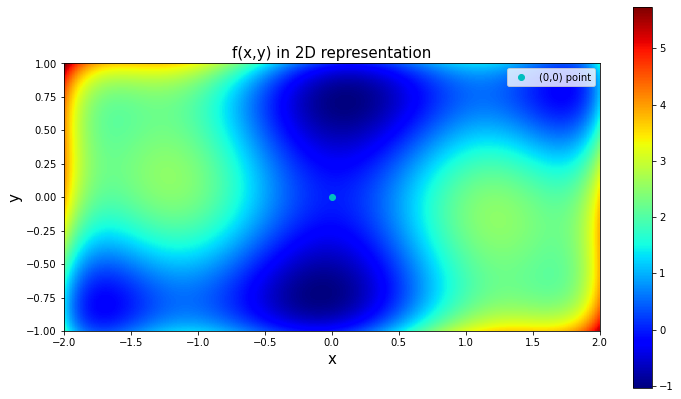

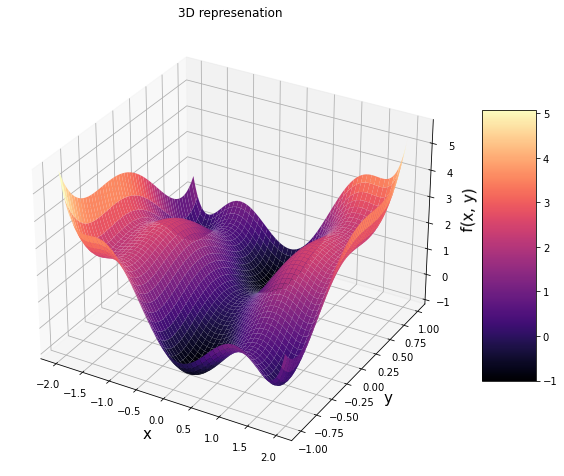

In [41]:
#Task 1

#Define function whicg are be analysed: 

def f(x0):
    [x, y] = x0
    return (4 - 2.1 * (x**2) + (x**4) / 3) * (x**2) + x*y + (4*(y**2) - 4) * (y**2)

#Definition of the grid

x = np.arange(-2, 2, 0.02)
y = np.arange(-1, 1, 0.01)

xv, yv = np.meshgrid(x, y)
xy = f([xv, yv])

#Plot

plt.figure(figsize=(12,7))
plt.imshow(xy, extent=[-2, 2, -1, 1],cmap='jet')
plt.title('f(x,y) in 2D representation', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.colorbar(cmap='jet')#jet

print("Darkest regions are the one which represents minima of the function")


#Minimization
gmin1 = optimize.minimize(f, [-2, -1])
gmin2 = optimize.minimize(f, [+2, +1])

print("Global minima 1 : f(",gmin1.x,") = ", gmin1.fun)
print("Global minima 2 : f(",gmin2.x,") = ", gmin2.fun)

#Two minimization processes give two global minima:
# (x1,y1)=(0.08984184 ,-0.71265628)
# (x2,y2)=(-0.08984184 ,0.71265628)
#value of the function in these points which represents minima is: f(x,y)= -1.0316284534896591


gmin3 = optimize.minimize(f, [0, 0])
print("The found minima for initial guess (0,0) : f(", gmin3.x,") = ", gmin3.fun)
print("The result for initial guess does not lead to  global minima.")
#The starting point in (0,0) is not a good choice, because it will lead to saddlepoint which is minimax point.
plt.plot(gmin3.x[0], gmin3.x[1], 'co', label='(0,0) point')
plt.legend()
plt.show()



# 3d plot

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xv,yv,xy,cmap="magma")
fig.set_figwidth(10)
fig.set_figheight(10)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('3D represenation')
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_zlabel('f(x, y)', fontsize = 15)
plt.show()

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

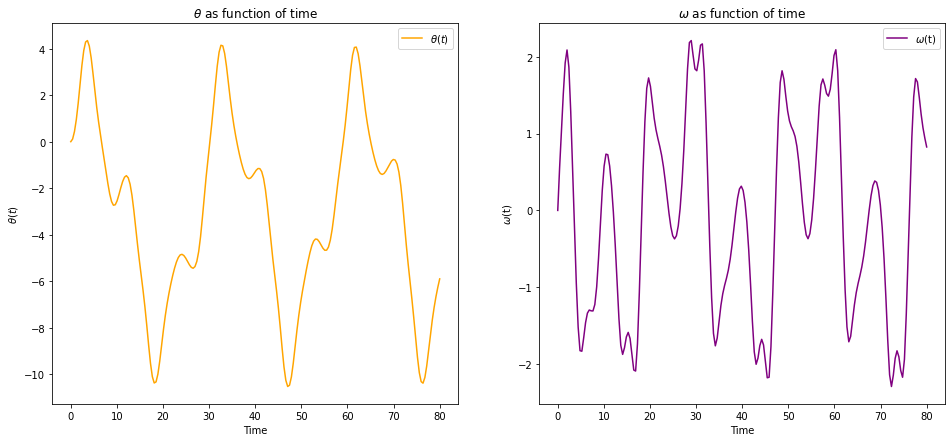

In [42]:
#Task 2

# Function that computes the derivatives of theta and omega
def derivatives(variables, t, Q, d, Omega):
    theta, omega = variables
    dtheta_dt = omega
    domega_dt = -1/Q * omega + np.sin(theta) + d * np.cos(Omega * t)
    return dtheta_dt, domega_dt

# Initial conditions
theta0 = 0
omega0 = 0

# Parameters
Q = 2.0
d = 1.5
Omega = 0.65

# Time grid for the solution
t = np.linspace(0, 80, 200)

# Solve the ODE
solution = odeint(derivatives, [theta0, omega0], t, args=(Q, d, Omega))
theta, omega = solution[:,0], solution[:,1]

# Plot theta and omega as functions of time
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
ax1.plot(t, theta, label=r"$\theta(t)$", color='orange')
ax1.set_title(r"$\theta$"' as function of time')
ax1.set_xlabel('Time')
ax1.set_ylabel(r'$\theta(t)$')
ax1.legend()

ax2.plot(t, omega, label=r"$\omega$(t)", color='purple')
ax2.set_title( r"$\omega$"' as function of time')
ax2.set_xlabel('Time')
ax2.set_ylabel(r"$\omega$(t)")
ax2.legend()

plt.show()


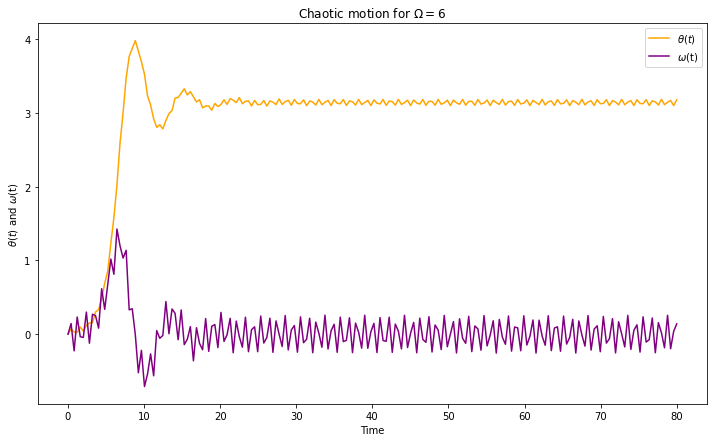

Text(0.5, 1.0, 'phase space')

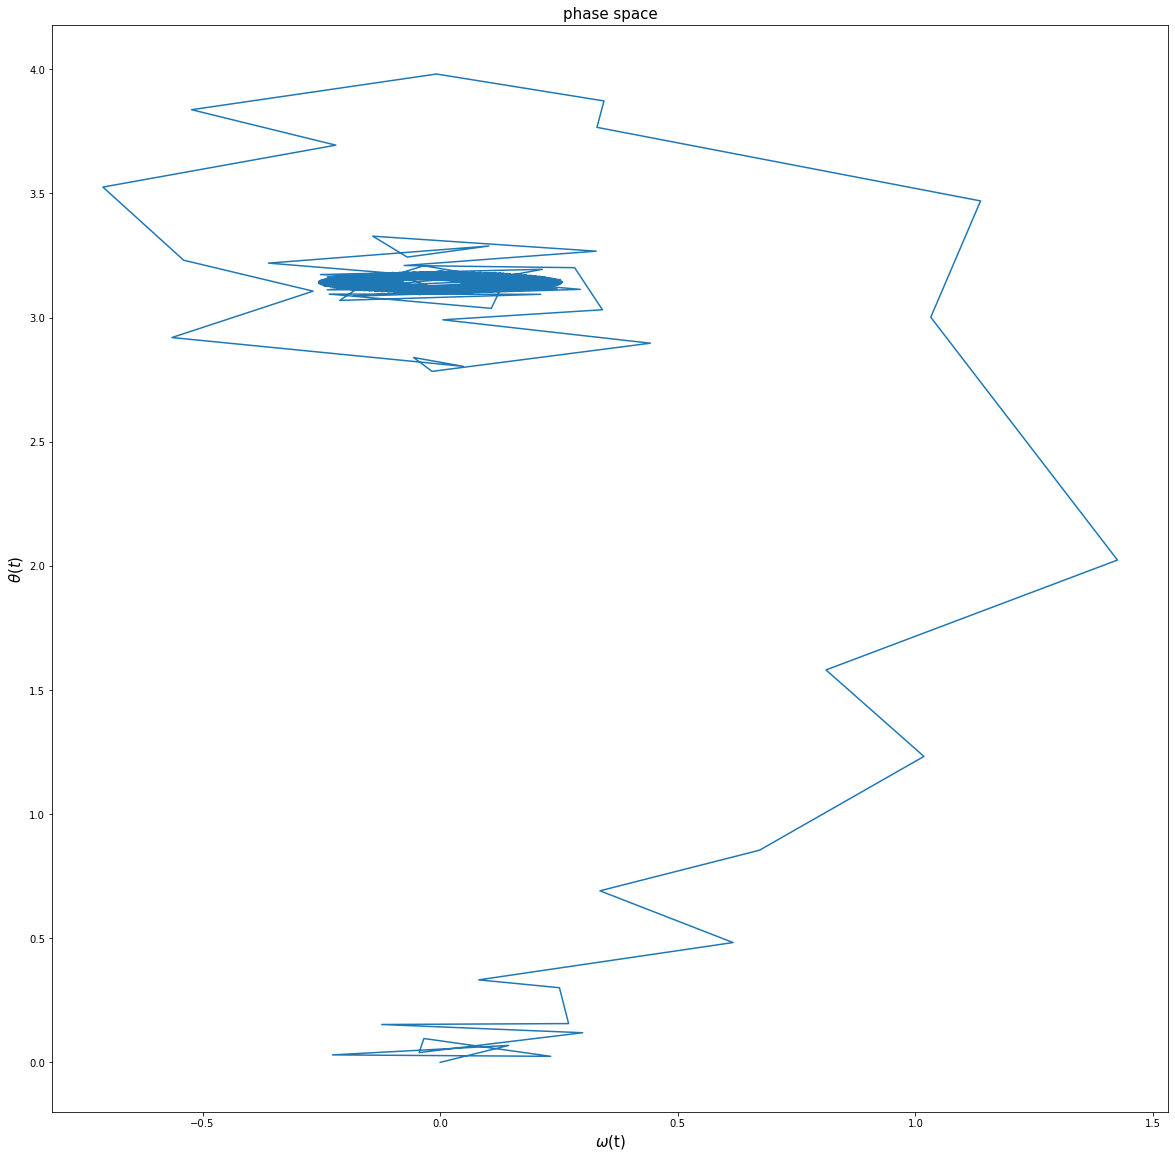

In [43]:
#Chaotic motion

# Function that computes the derivatives of theta and omega
def derivatives(variables, t, Q, d, Omega):
    theta, omega = variables
    dtheta_dt = omega
    domega_dt = -1/Q * omega + np.sin(theta) + d * np.cos(Omega * t)
    return dtheta_dt, domega_dt

# Initial conditions
theta0 = 0
omega0 = 0 #0

# Parameters
Q = 2.0 #2.0
d = 1.5 #1.5
Omega = 6 #changed parameter

# Time grid for the solution
t = np.linspace(0, 80, 200)

# Solve the ODE
solution = odeint(derivatives, [theta0, omega0], t, args=(Q, d, Omega))
theta, omega = solution[:,0], solution[:,1]

# Plot theta and omega as functions of time
plt.figure(figsize=(12,7))
plt.plot(t, theta, label=r"$\theta(t)$", color='orange')
plt.plot(t, omega, label=r"$\omega$(t)", color='purple')
plt.title('Chaotic motion for $\Omega=6$')
plt.xlabel('Time')
plt.ylabel(r"$\theta(t)$" ' and ' r"$\omega$(t)" )
plt.legend()
plt.show()

plt.figure(figsize=(20,20))
plt.plot(omega, theta)
plt.xlabel(r"$\omega$(t)", fontsize=15)
plt.ylabel(r"$\theta(t)$", fontsize=15)
plt.title("phase space",fontsize=15)

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

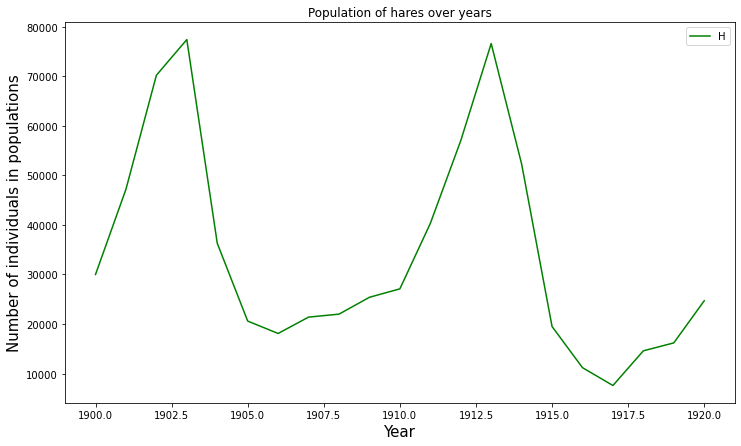

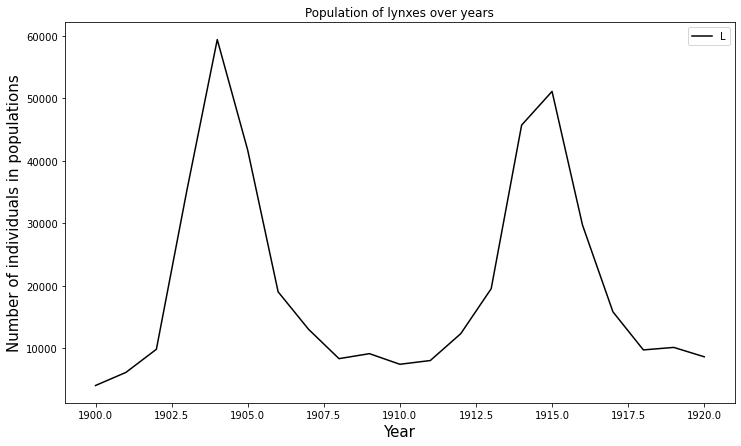

Above shown graphs show periodicity in these two animals populations


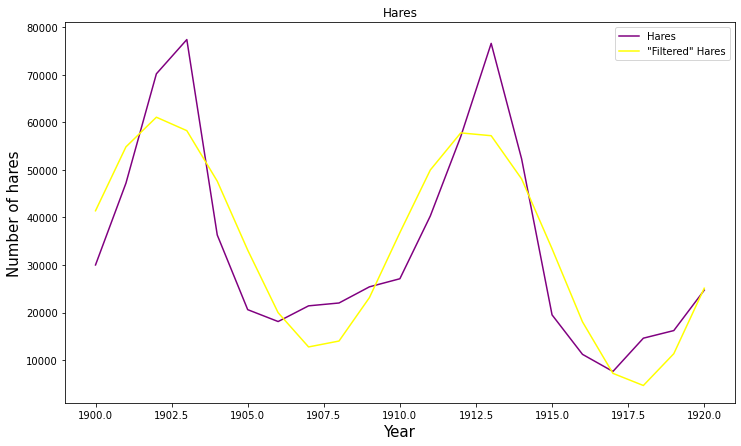

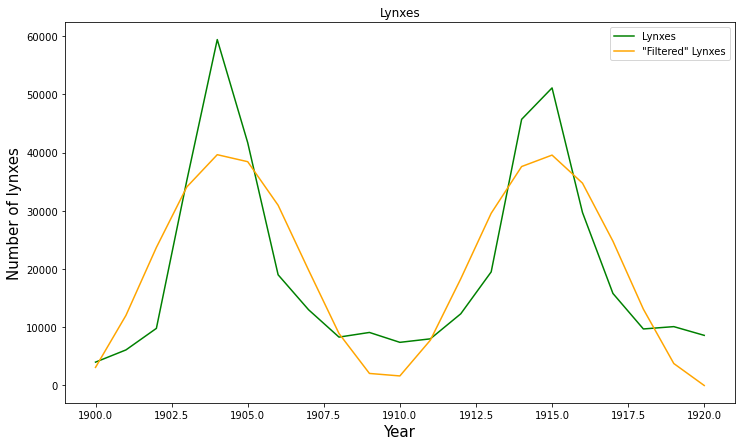

Period of Hares is:  10.5
Period of  Lynxes is:  10.5


In [44]:
#Task 3
#A periodicy of the lynax-hares population

data = np.loadtxt('populations.txt')
year, hares, lynxes,carrots = data.T


#Ploting data which represents populations of hares and lynxs
plt.figure(figsize=(12,7))
plt.title("Population of hares over years")
plt.plot(year, hares, "g") 
plt.legend('Hare')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of individuals in populations',fontsize=15)
plt.show()

plt.figure(figsize=(12,7))
plt.title("Population of lynxes over years")
plt.plot( year, lynxes, "k") 
plt.legend( 'Lynx')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of individuals in populations',fontsize=15)
plt.show()
print('Above shown graphs show periodicity in these two animals populations')


#FFT of the signals
fft_hares = fftpack.fft(hares)
fft_lynxes = fftpack.fft(lynxes)

#Power spectrum
power_hares = np.abs(fft_hares)
power_lynxes = np.abs(fft_lynxes)


#The return the corresponding frequencies
sample_freqs = fftpack.fftfreq(hares.size)


# Find the peak frequency (max of freqs array): focus only on the positive f
mask = np.where(sample_freqs > 0)

freqs = sample_freqs[mask]


#Peaks of the frequencies
peak_h = freqs[power_hares[mask].argmax()]
peak_l = freqs[power_lynxes[mask].argmax()]

high_freq_h = fft_hares.copy()
high_freq_l = fft_lynxes.copy()


high_freq_h[np.abs(sample_freqs)>peak_h] = 0
high_freq_l[np.abs(sample_freqs)>peak_l] = 0


filtered_h = np.real(fftpack.ifft(high_freq_h))
filtered_l = np.real(fftpack.ifft(high_freq_l))
#filtered_c = fftpack.ifft(high_freq_c)


#ybounds = [0, 80000]

#Plotting the filtered functions
plt.figure(figsize=(12,7))
plt.title("Hares")
plt.plot(year, hares, label='Hares', color='purple')
plt.plot(year, filtered_h, label='"Filtered" Hares', color="yellow")
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of hares',fontsize=15)
plt.legend()
plt.show()

plt.figure(figsize=(12,7))
plt.title("Lynxes")
plt.plot(year, lynxes, label='Lynxes', color="green")
plt.plot(year, filtered_l, label='"Filtered" Lynxes', color="orange")
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of lynxes', fontsize=15)
plt.legend()
plt.show()


#Periods of the frequencies of populations:
print('Period of Hares is: ', 1/peak_h)
print('Period of  Lynxes is: ', 1/peak_l)


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

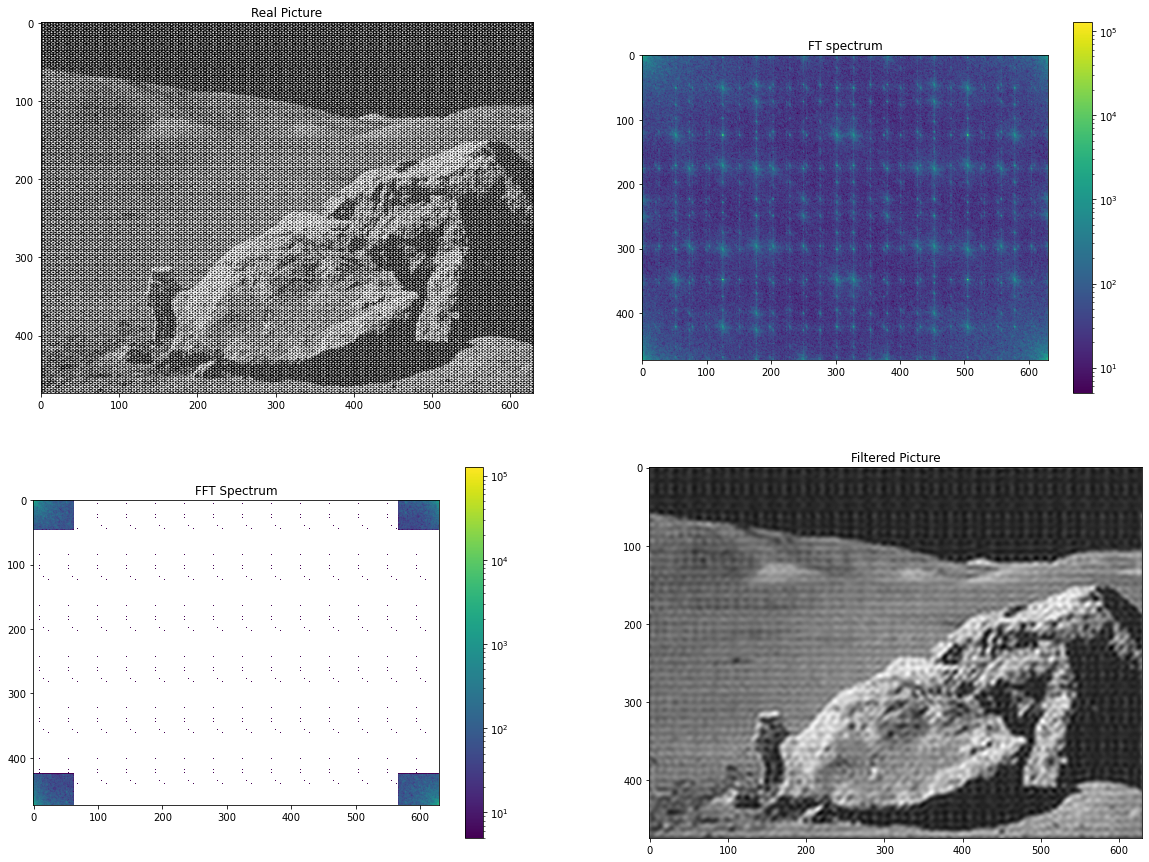

In [45]:
#Task 4

gs = (2, 2) 
fig = plt.figure(figsize=(20, 15))

ax1 = plt.subplot2grid(gs, (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid(gs, (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid(gs, (1, 0), rowspan=1, colspan=1)
ax4 = plt.subplot2grid(gs, (1, 1), rowspan=1, colspan=1)

# real image
orignal_mo = plt.imread('images/moonlanding.png')
ax1.imshow(orignal_mo, plt.cm.gray)
ax1.set_title('Real Picture')

# Fourier transformation Spectrum
image_fft = fftpack.fft2(orignal_mo) 
image_fft_col=ax2.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.colorbar(image_fft_col, ax=ax2) # checking the color
ax2.set_title('FT spectrum')

# Clearing Redundant Info from FT
keep = 0.1 # fraction of coefficients to keep
image_fft2 = image_fft.copy()
rows, cols = image_fft2.shape



# Row
image_fft2[int(rows*keep):int(rows*(1-keep)), :] = 0 

#col
image_fft2[:, int(cols*keep):int(cols*(1-keep))] = 0 
image_fft2_col=ax3.imshow(np.abs(image_fft2), norm=LogNorm(vmin=5))
plt.colorbar(image_fft2_col, ax=ax3) # to understand the meaning of the colours
ax3.set_title('FFT Spectrum')

# from filtered specturm reconstructing de-noised image


# Real
image_new = fftpack.ifft2(image_fft2).real 
ax4.imshow(image_new, plt.cm.gray)
ax4.set_title('Filtered Picture')

plt.show()